**Importing Libraries**

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
!pip install tensorflow

In [28]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Preparing the Image data**

In [30]:
import os

dataset_path = '/content/drive/My Drive/brain_tumor_dataset'

folders = os.listdir(dataset_path)
print(folders)


['yes', 'no']


In [31]:
subdirs = os.listdir(dataset_path)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(dataset_path+'/'+subdir))} images")

yes contains 155 images
no contains 98 images


In [32]:
def load_images(folder):

    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels


In [33]:
data, labels = load_images(dataset_path)
data.shape, labels.shape

((253, 128, 128), (253,))

**Visualizing images**

In [34]:
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)

1. 10 images with brain tumor

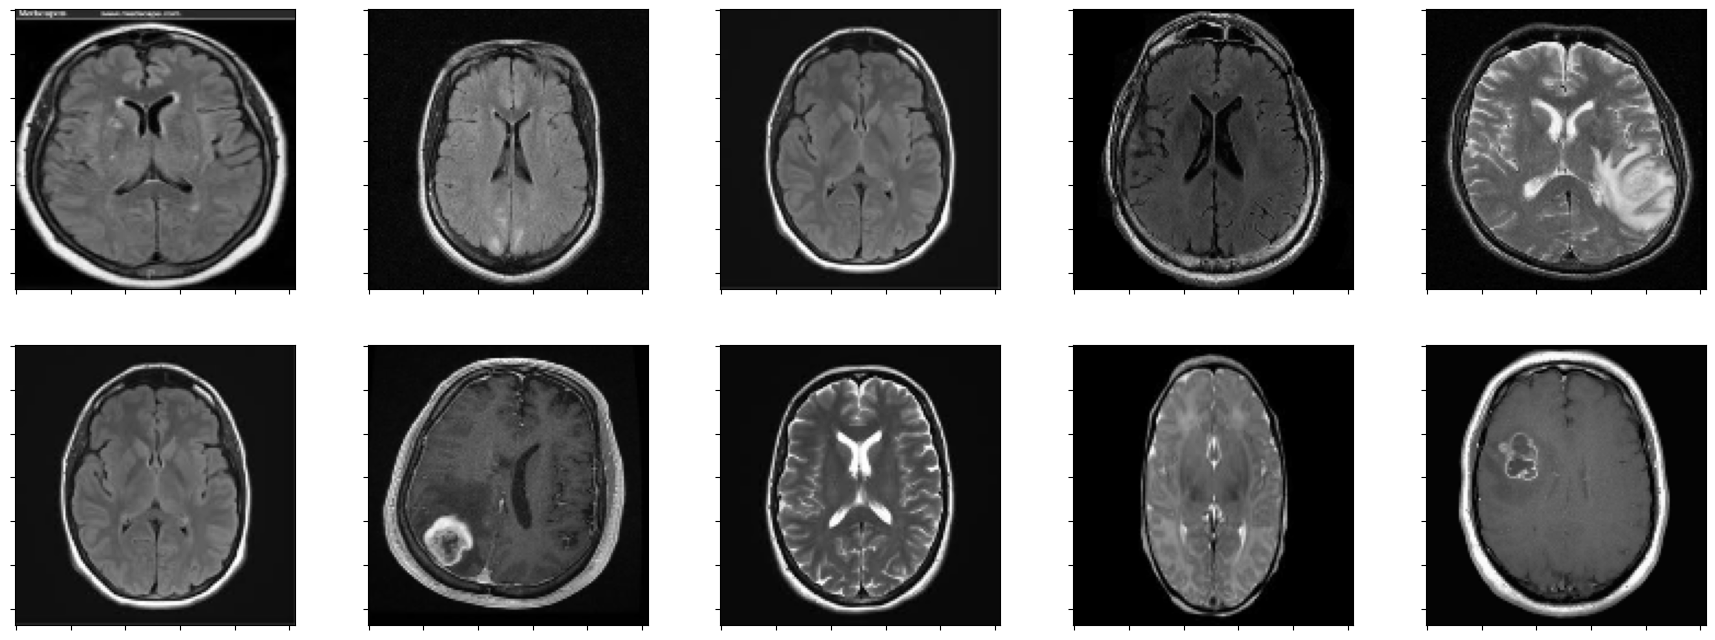

In [ ]:
plot_images(98,252)

2. 10 images with no brain tumor

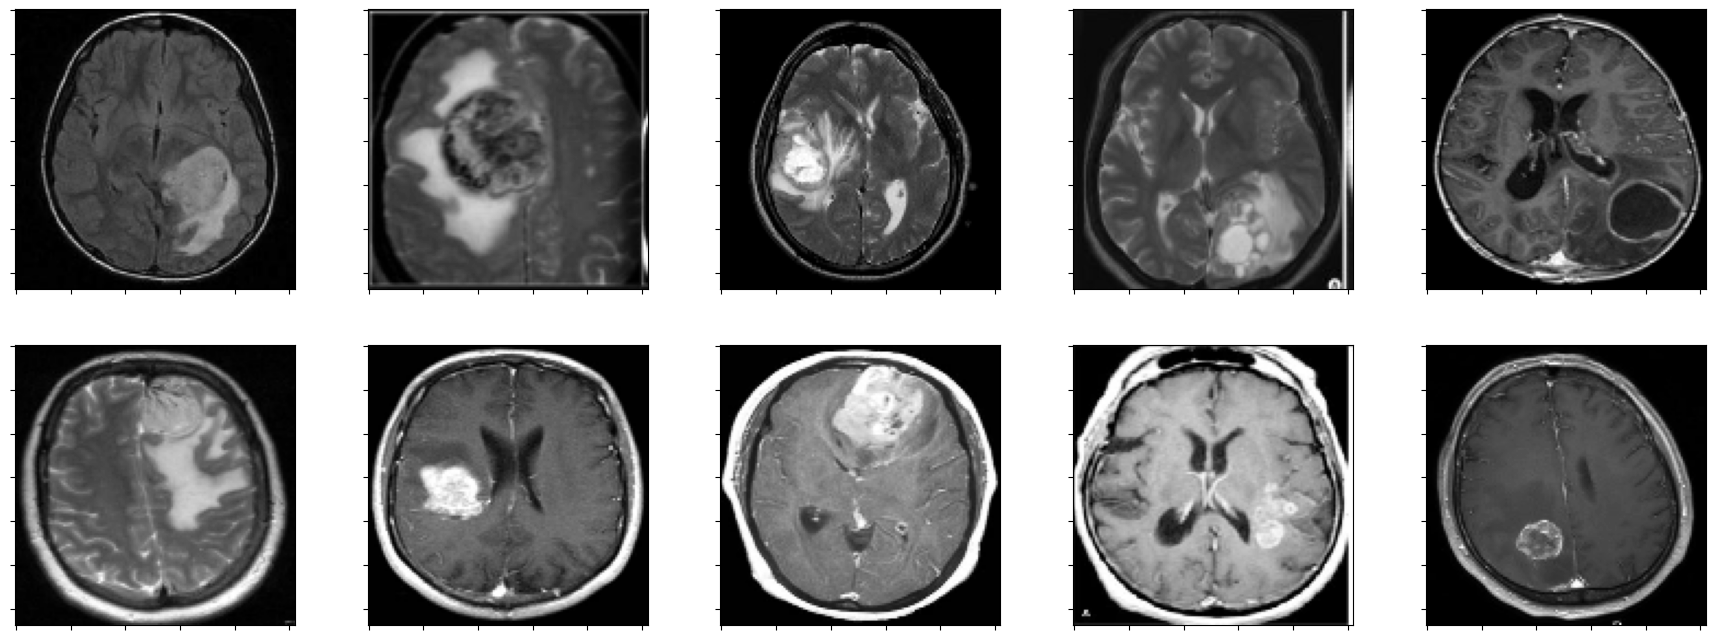

In [ ]:
plot_images(0,97)

**Normalization**

in Image Classification,

*Xnorm = (X - Xmin) / (Xmax - Xmin) italicized text*

with images,
*Xmin* is 0 and *Xmax* is 255

after which, we will be using Numpy's expand_dims() to add dimension to our data.

In [ ]:
norm_data = data / 255.
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((253, 128, 128, 1),
 array([[[0.00392157],
         [0.00392157],
         [0.00784314],
         ...,
         [0.00392157],
         [0.00784314],
         [0.00784314]],
 
        [[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.00784314],
         [0.00392157],
         [0.00784314]],
 
        [[0.        ],
         [0.00392157],
         [0.00392157],
         ...,
         [0.01176471],
         [0.        ],
         [0.00392157]],
 
        ...,
 
        [[0.01568627],
         [0.00784314],
         [0.        ],
         ...,
         [0.00784314],
         [0.00392157],
         [0.00392157]],
 
        [[0.00392157],
         [0.00784314],
         [0.00392157],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.01176471],
         [0.01568627],
         [0.01176471],
         ...,
         [0.01960784],
         [0.01960784],
         [0.00784314]]]))

**Convolutional Neural Network**

In [ ]:
SEED = 40

In [ ]:
tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**compiling the model**

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

**fitting the model**

In [ ]:
history = model.fit(norm_data, labels, epochs = 10, validation_split = 0.20)

Epoch 1/10
7/7 [==============================] - 20s 3s/step - loss: 0.6692 - accuracy: 0.7426 - val_loss: 1.0201 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 0.6144 - accuracy: 0.7673 - val_loss: 0.7620 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 0.5943 - accuracy: 0.7673 - val_loss: 1.2821 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 0.4991 - accuracy: 0.7673 - val_loss: 1.4736 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 22s 3s/step - loss: 0.4940 - accuracy: 0.7673 - val_loss: 1.1084 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 17s 2s/step - loss: 0.4675 - accuracy: 0.7673 - val_loss: 1.2430 - val_accuracy: 0.0196
Epoch 7/10
7/7 [==============================] - 18s 3s/step - loss: 0.4490 - accuracy: 0.8168 - val_loss: 0.8819 - val_accuracy: 0.5686
Epoch 8/10
7/7

**Evaluation**

In [ ]:
result = model.evaluate(norm_data, labels, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 78.26%
Loss: 0.5202


this above result gives the evaluation on the training set only, now we will make predictions on randomly picked images from the training data and compare our results.

randomly generating 20 numbers to index from data

In [ ]:
np.random.seed(SEED)
indxs = np.random.randint(0, 252, 20)

In [ ]:
y_pred_prob = model.predict(norm_data[indxs])
y_pred = np.array([1 if prob>0.5 else 0 for prob in y_pred_prob])

y_true = labels[indxs]
y_pred.shape, y_true.shape

1/1 [==============================] - 1s 584ms/step


((20,), (20,))

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

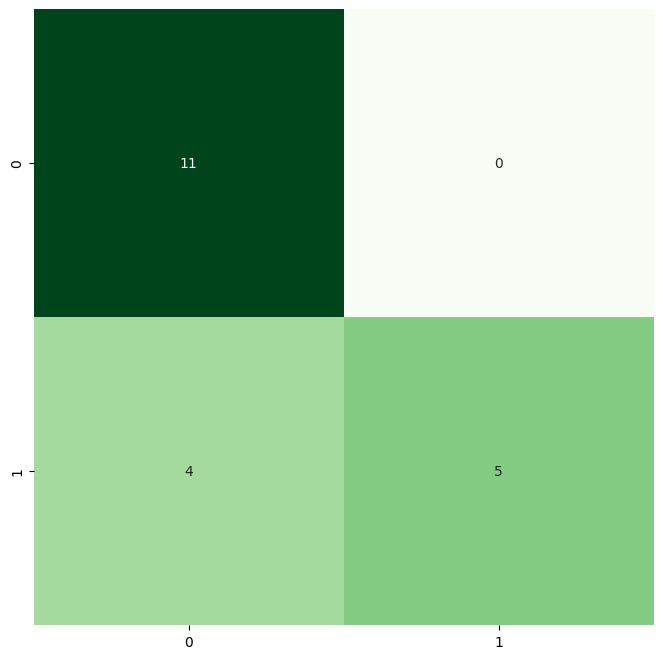

In [ ]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = ".2g", cbar = False)
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.56      0.71         9

    accuracy                           0.80        20
   macro avg       0.87      0.78      0.78        20
weighted avg       0.85      0.80      0.79        20



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 16)        0         
 g2D)                                                   

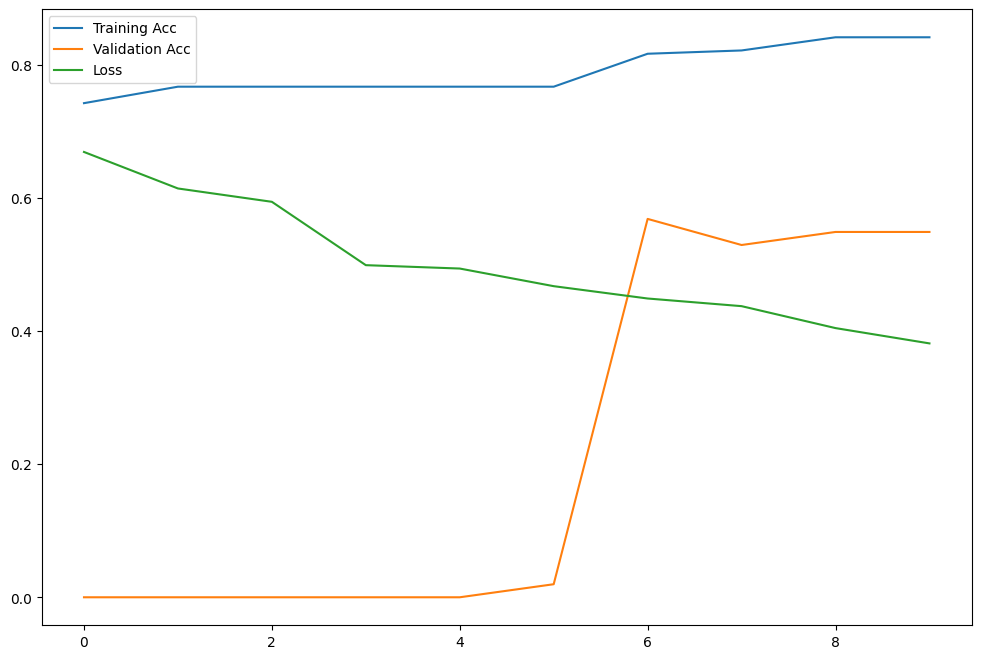

In [ ]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()